# Checkpoint 1

Reminder: 

- You are being evaluated for completion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.
- Please do not remove any comment that starts with: "# @@@". 

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math


* Pick or create features to use


>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>).


Include comments throughout your code! Every cleanup and preprocessing task should be documented.


<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [3]:
import numpy as np        # Import NumPy
import pandas as pd       # Import Pandas
import matplotlib.pyplot as plt  # Import Matplotlib


Matplotlib is building the font cache; this may take a moment.


Load in the "states_edu.csv" dataset and take a look at the head of the data

In [5]:
statesedu = pd.read_csv("/Users/zionm/Downloads/MDST-Onboarding-main/data/states_edu.csv")
print(statesedu.head())

       PRIMARY_KEY       STATE  YEAR  ENROLL  TOTAL_REVENUE  FEDERAL_REVENUE  \
0     1992_ALABAMA     ALABAMA  1992     NaN      2678885.0         304177.0   
1      1992_ALASKA      ALASKA  1992     NaN      1049591.0         106780.0   
2     1992_ARIZONA     ARIZONA  1992     NaN      3258079.0         297888.0   
3    1992_ARKANSAS    ARKANSAS  1992     NaN      1711959.0         178571.0   
4  1992_CALIFORNIA  CALIFORNIA  1992     NaN     26260025.0        2072470.0   

   STATE_REVENUE  LOCAL_REVENUE  TOTAL_EXPENDITURE  INSTRUCTION_EXPENDITURE  \
0      1659028.0       715680.0          2653798.0                1481703.0   
1       720711.0       222100.0           972488.0                 498362.0   
2      1369815.0      1590376.0          3401580.0                1435908.0   
3       958785.0       574603.0          1743022.0                 964323.0   
4     16546514.0      7641041.0         27138832.0               14358922.0   

   ...  GRADES_4_G  GRADES_8_G  GRADES_12_G 

You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [8]:
print(statesedu.columns)
print(statesedu.info())

Index(['PRIMARY_KEY', 'STATE', 'YEAR', 'ENROLL', 'TOTAL_REVENUE',
       'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
       'CAPITAL_OUTLAY_EXPENDITURE', 'GRADES_PK_G', 'GRADES_KG_G',
       'GRADES_4_G', 'GRADES_8_G', 'GRADES_12_G', 'GRADES_1_8_G',
       'GRADES_9_12_G', 'GRADES_ALL_G', 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE',
       'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1715 entries, 0 to 1714
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   PRIMARY_KEY                   1715 non-null   object 
 1   STATE                         1715 non-null   object 
 2   YEAR                          1715 non-null   int64  
 3   ENROLL                        1224 non-null   float64
 4   TOTA

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen one of Grade 4 Reading, Grade 4 Math, or Grade 8 Math to focus on: *ENTER YOUR CHOICE HERE*

How many years of data are logged in our dataset? 

In [12]:
# @@@ 1
num_years = statesedu['YEAR'].nunique()
print(f"there are {num_years} years of data in the dataset")

there are 33 years of data in the dataset


Let's compare Michigan to Ohio. Which state has the higher average across all years in the test you chose?

In [18]:
# @@@ 2
michigan_avg = statesedu[statesedu['STATE'] == 'MICHIGAN']['AVG_MATH_4_SCORE'].mean()
ohio_avg = statesedu[statesedu['STATE'] == 'OHIO']['AVG_MATH_4_SCORE'].mean()
if michigan_avg > ohio_avg:
    print(f"michigan is better that ohio :) ({michigan_avg:.2f}) > ({ohio_avg:.2f})")
else:
    print(f"ohio is better than michigan :( ({ohio_avg:.2f}) > ({michigan_avg:.2f})")

ohio is better than michigan :( (239.45) > (234.36)


Find the average for your chosen test across all states in 2019

In [19]:
# @@@ 3
avg_2019 = statesedu[statesedu['YEAR'] == 2019]['AVG_MATH_4_SCORE'].mean()
print(f"average test score across all states in 2019 is {avg_2019:.2f}.")

average test score across all states in 2019 is 239.94.


For each state, find a maximum value for your chosen test score

In [20]:
# @@@ 4
max_scores_by_state = statesedu.groupby('STATE')['AVG_MATH_4_SCORE'].max().reset_index()
print(max_scores_by_state)

                   STATE  AVG_MATH_4_SCORE
0                ALABAMA             233.0
1                 ALASKA             237.0
2                ARIZONA             240.0
3               ARKANSAS             240.0
4             CALIFORNIA             235.0
5               COLORADO             247.0
6            CONNECTICUT             245.0
7               DELAWARE             243.0
8   DISTRICT_OF_COLUMBIA             235.0
9                  DODEA             250.0
10               FLORIDA             246.0
11               GEORGIA             240.0
12                HAWAII             243.0
13                 IDAHO             242.0
14              ILLINOIS             239.0
15               INDIANA             249.0
16                  IOWA             246.0
17                KANSAS             248.0
18              KENTUCKY             242.0
19             LOUISIANA             234.0
20                 MAINE             246.0
21              MARYLAND             247.0
22         

*Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [22]:
# @@@ 5
statesedu['EXPENDITURE_PER_STUDENT'] = statesedu['TOTAL_EXPENDITURE'] / statesedu['ENROLL']
statesedu['REVENUE_TO_EXPENDITURE_RATIO'] = statesedu['TOTAL_REVENUE'] / statesedu['TOTAL_EXPENDITURE']

Feature engineering justification: **<BRIEFLY DESCRIBE WHY YOU MADE THE CHANGES THAT YOU DID\>**

Expenditure per student may directly correlate with performance scores, as more investment might result in better resources and outcomes.

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

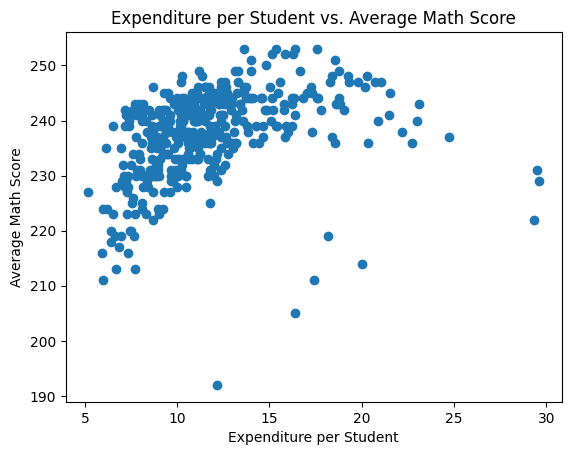

In [24]:
# @@@ 6

plt.scatter(statesedu['EXPENDITURE_PER_STUDENT'], statesedu['AVG_MATH_4_SCORE'])
plt.title('Expenditure per Student vs. Average Math Score')
plt.xlabel('Expenditure per Student')
plt.ylabel('Average Math Score')
plt.show()

Investigate the relationship between EXPENDITURE_PER_STUDENT and AVG_MATH_4_SCORE

**Visualization 2**

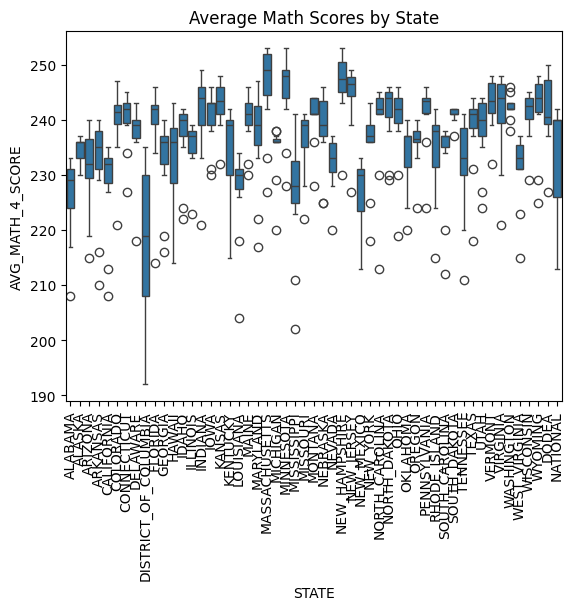

In [28]:
# @@@ 7
import seaborn as sns

sns.boxplot(x='STATE', y='AVG_MATH_4_SCORE', data=statesedu)
plt.xticks(rotation=90)
plt.title('Average Math Scores by State')
plt.show()

Use this space to rename columns, deal with missing data, etc. _(optional)_

Compare the AVG_MATH_4_SCORE across different states:

Overall findings:
States with higher expenditures per student tend to have higher average scores.

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
# @@@ 8

X = statesedu[['TOTAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE']]  
y = statesedu['AVG_MATH_4_SCORE'] 

In [47]:
# @@@ 9 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.fillna(0)
y_train = y_train.fillna(y_train.mean())  

X_test = X_test.fillna(0)
y_test = y_test.fillna(y_train.mean())  


<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [48]:
# @@@ 10
# import your sklearn class here

print("Training features shape:", X_train.shape)
print("Testing features shape:", X_test.shape)


Training features shape: (1372, 3)
Testing features shape: (343, 3)


In [49]:
# @@@ 11
# create your model here
# model = 

from sklearn.linear_model import LinearRegression

model = LinearRegression()


In [51]:


print(y_train.head())
print(y_train.dtypes)

model.fit(X_train, y_train)


668     239.000000
1558    236.160793
420     224.000000
669     242.000000
905     244.000000
Name: AVG_MATH_4_SCORE, dtype: float64
float64


LinearRegression()

In [52]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [55]:
# @@@ 12
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")

Mean Absolute Error (MAE): 2.3315157228355115
Mean Squared Error (MSE): 22.00011032191388
R-squared (R²): 0.0009228205993446759


We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

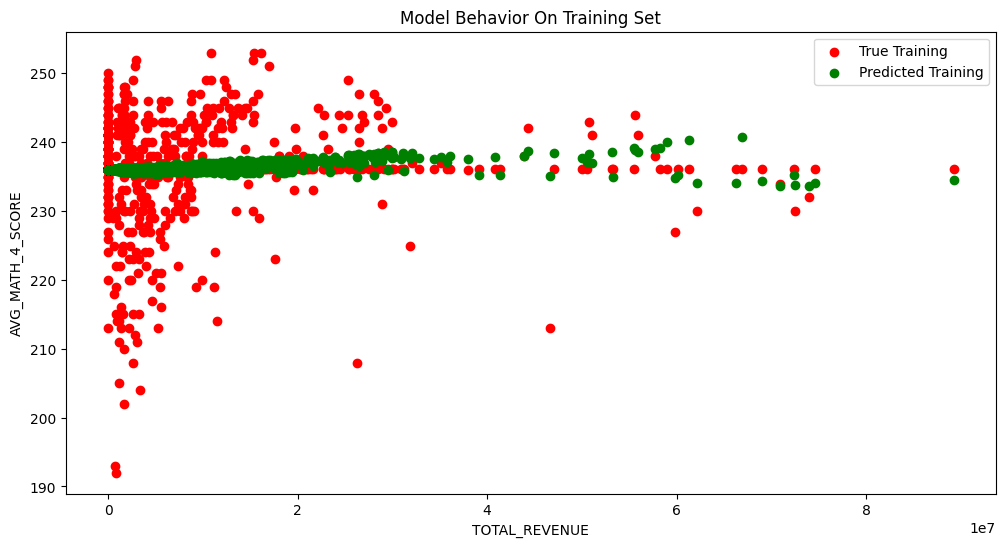

In [54]:
col_name = 'TOTAL_REVENUE'

plt.figure(figsize=(12, 6))
plt.scatter(X_train[col_name], y_train, color="red", label="True Training")
plt.scatter(X_train[col_name], model.predict(X_train), color="green", label="Predicted Training")
plt.legend()
plt.xlabel(col_name)  
plt.ylabel('AVG_MATH_4_SCORE')
plt.title("Model Behavior On Training Set")
plt.show()

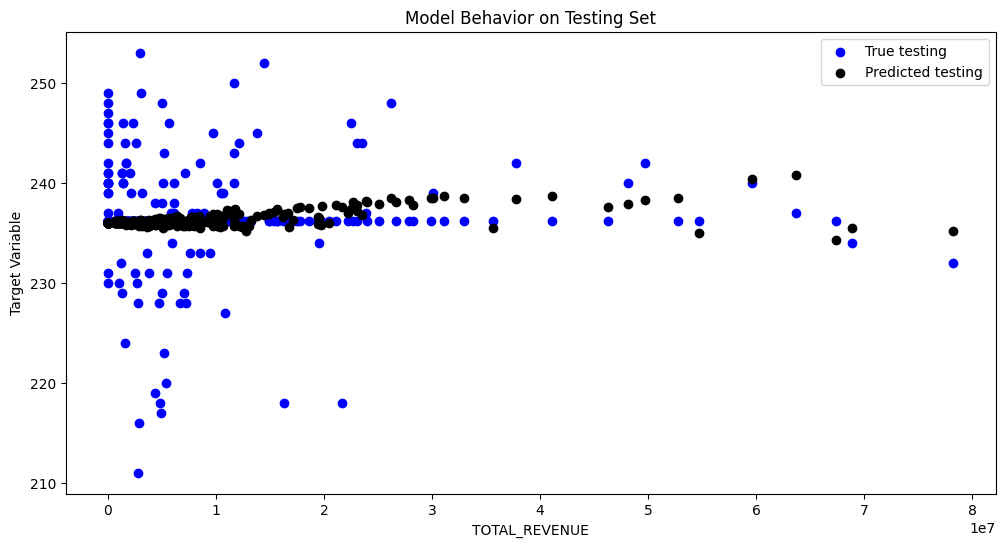

In [56]:
col_name = 'TOTAL_REVENUE'

f = plt.figure(figsize=(12, 6))
plt.scatter(X_test[col_name], y_test, color="blue", label="True testing")
plt.scatter(X_test[col_name], model.predict(X_test), color="black", label="Predicted testing") 

plt.legend()
plt.xlabel(col_name) 
plt.ylabel('Target Variable') 
plt.title("Model Behavior on Testing Set")

plt.show()
